# Milestone 1 Deliverables for **Mental Health Support Chatbot Project**
---

### **Data Collection Report**

**Source:** The dataset in `intents.json` contains conversational intents and corresponding responses for a mental health support chatbot.

**Data Overview:**
- **Intents:** The dataset includes 60 intents with various emotional states and mental health-related queries.
- **Patterns:** Each intent is associated with a list of patterns (phrases/questions) that users might ask.
- **Responses:** For each pattern, the chatbot is designed to respond with predefined responses.

**Categories of Emotions:**
- **Anxiety:** "I feel so anxious", "I'm so anxious because of."
- **Depression:** "I can't take it anymore", "I am so depressed."
- **Stress:** "I am so stressed", "I feel stuck."
- **Sadness/Loneliness:** "I feel so lonely", "I feel sad", "I am lonely."
- **Neutral:** Greetings, goodbyes, and casual responses.
  
The dataset covers multiple aspects of emotional conversations, including sadness, stress, depression, anxiety, and even greetings and goodbyes.

---


In [ ]:
# @title **Data Preprocessing Script**
import json
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')

# Load the intents dataset
with open('intents.json') as f:
    data = json.load(f)

# Prepare the data for preprocessing
patterns = []
tags = []

# Extract patterns and tags from the dataset
for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])

# Create a DataFrame
df = pd.DataFrame({'pattern': patterns, 'tag': tags})

# Data cleaning - remove empty patterns
df.dropna(inplace=True)

# Text preprocessing - tokenization and stop words removal
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

df['cleaned_pattern'] = df['pattern'].apply(preprocess_text)

# Split the data into training and validation sets (80% train, 20% validation)
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# Save preprocessed data for model training
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)

print("Data preprocessing completed!")

Data preprocessing completed!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


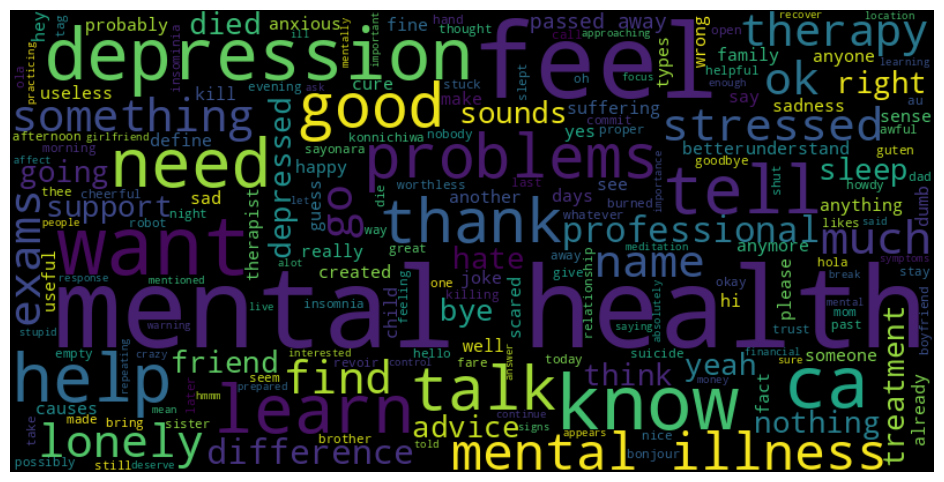

In [ ]:
# @title **Initial Data Insights**
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud for frequent words in the patterns
all_words = ' '.join(df['cleaned_pattern'])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(all_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

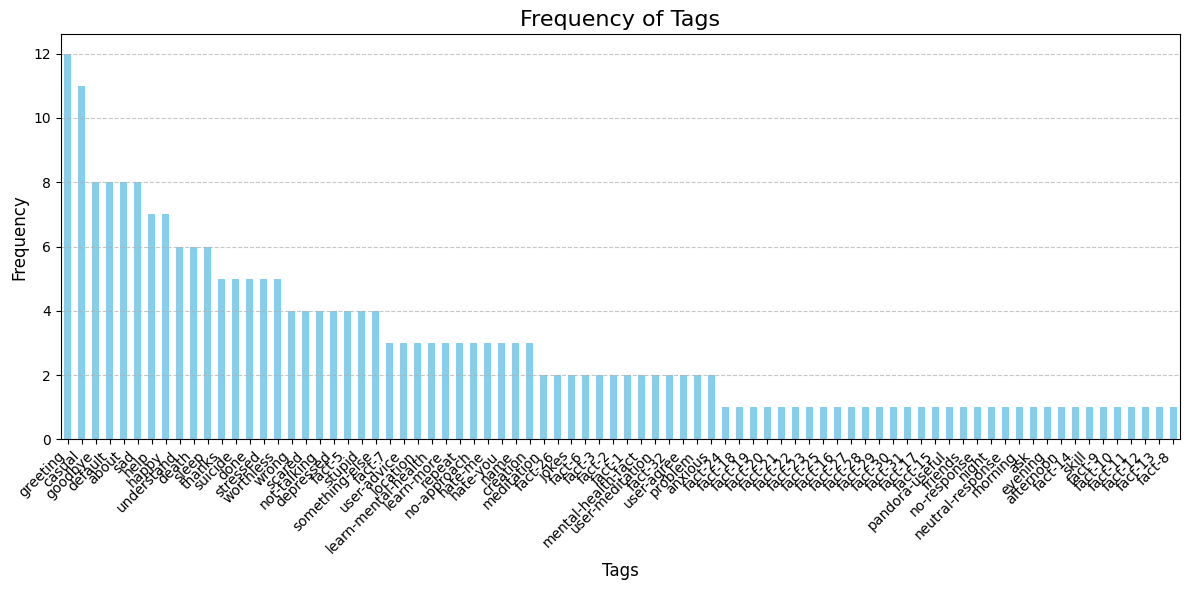

In [ ]:
# @title **Frequency of Tags**
import matplotlib.pyplot as plt

# Adjust the size of the plot
plt.figure(figsize=(12, 6))

# Plot the intent distribution
df['tag'].value_counts().plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Frequency of Tags', fontsize=16)
plt.xlabel('Tags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

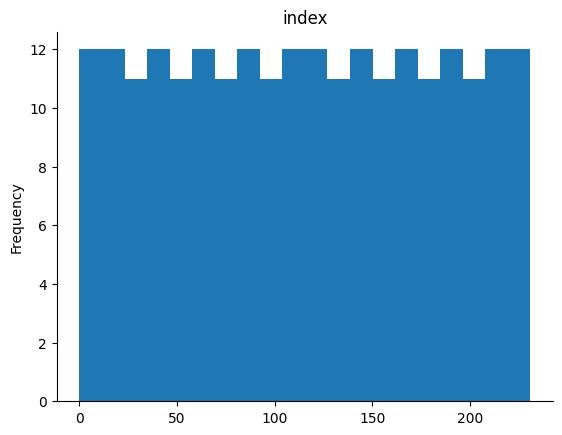

In [ ]:
# @title **Distributions**
from matplotlib import pyplot as plt
_df_3['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

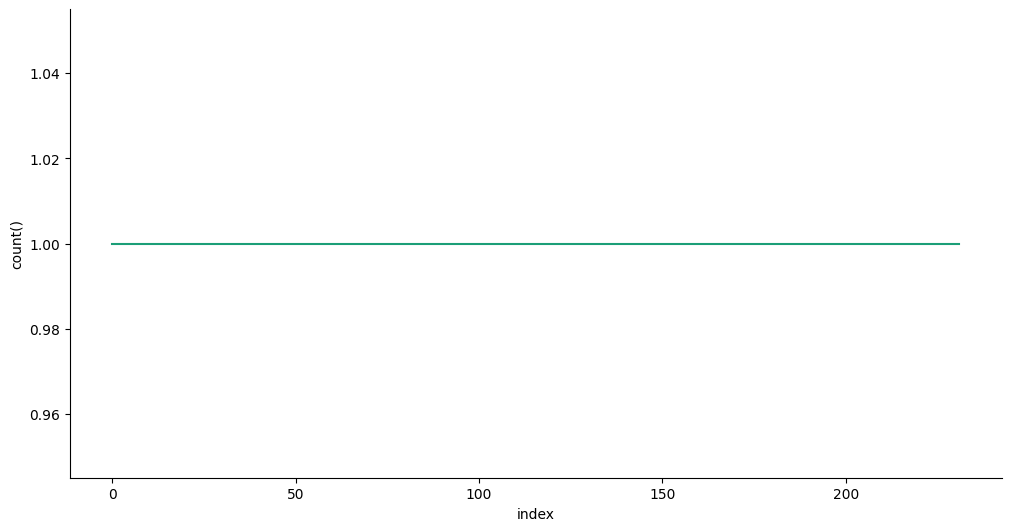

In [ ]:
# @title **Time series**
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

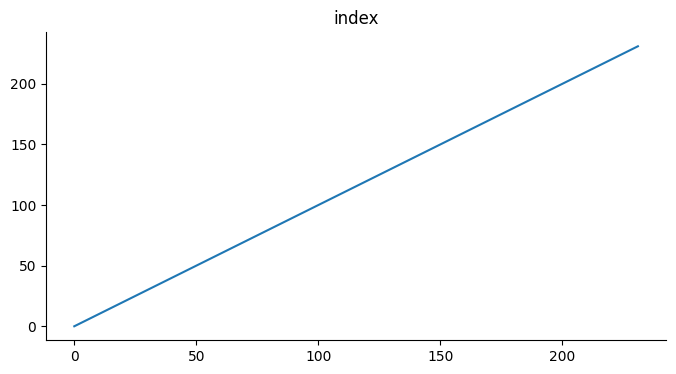

In [ ]:
# @title **Values**
from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

# Milestone 2 - Training and Saving the Model

In [ ]:
# @title Import Libraries
# Importing necessary libraries
import nltk
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import random

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# @title Load and Preprocess Data
# Initialize lists to hold words, classes, and documents
words = []
classes = []
documents = []
ignore_words = ['?', '!']

# Load intents JSON data
with open('intents.json') as data_file:
    intents = json.load(data_file)

# Tokenize, lemmatize, and organize data into documents
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each word in the pattern
        w = nltk.word_tokenize(pattern)
        words.extend(w)

        # Add the tokenized pattern and intent tag to the documents list
        documents.append((w, intent['tag']))

        # Add the tag to classes if not already present
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize and lower each word, then remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# Sort classes
classes = sorted(list(set(classes)))

# Display information about processed data
print(f"{len(documents)} documents")
print(f"{len(classes)} classes: {classes}")
print(f"{len(words)} unique lemmatized words: {words}")

# Save the words and classes to disk
pickle.dump(words, open('texts.pkl', 'wb'))
pickle.dump(classes, open('labels.pkl', 'wb'))


283 documents
129 classes: ['What are the types of depression?', 'about', 'afternoon', 'anxious', 'ask', 'at what age does anxiety peak?', 'can lack of sleep make you feel sad?', 'can low blood sugar cause suicidal thoughts?', 'casual', 'creation', 'death', 'default', 'depressed', 'do we control our thoughts?', 'does oversleeping cause depression?', 'done', 'evening', 'fact-1', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-2', 'fact-20', 'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27', 'fact-28', 'fact-29', 'fact-3', 'fact-30', 'fact-31', 'fact-32', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9', 'friends', 'goodbye', 'greeting', 'happy', 'hate-me', 'hate-you', 'help', 'how can we reduce anxiety?', 'how does depression affect the world?', 'how long can anxiety last?', 'how many thoughts a day do we have?', 'i am a victim of bullying', 'i am afraid i will fail again', 'i am afraid to file

In [ ]:
# @title Create Training Data (Bag of Words)
# Create training data using bag of words
training = []
output_empty = [0] * len(classes)

# Prepare the training set
for doc in documents:
    # Initialize bag of words
    bag = []

    # Tokenize pattern words and lemmatize
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in doc[0]]

    # Create a bag of words: 1 if word is found in the pattern, 0 otherwise
    for w in words:
        bag.append(1 if w in pattern_words else 0)

    # Create an output row for the current intent tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    # Append the bag of words and the output row to the training data
    training.append([bag, output_row])


In [ ]:
# @title Shuffle, Split, and Convert Data to Numpy Arrays
from sklearn.model_selection import train_test_split

# Shuffle data and split into training and validation sets
random.shuffle(training)
train_x = np.array([data[0] for data in training])
train_y = np.array([data[1] for data in training])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

print("Training data created")
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training data created
Training set shape: (226, 355) (226, 129)
Validation set shape: (57, 355) (57, 129)


In [ ]:
# @title Define the Model Architecture
# Define the neural network model
model = Sequential()

# Input layer with 128 neurons
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))

# Hidden layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation (number of neurons equals the number of classes)
model.add(Dense(len(train_y[0]), activation='softmax'))

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          45,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 129)                 │           8,385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,209 (243.00 KB)

 Trainable params: 62,209 (243.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title Compile the Model with Updated Hyperparameters
# Compile the model with SGD optimizer and a slightly lower learning rate
sgd = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# @title Train the Model with Early Stopping and Validation Monitoring
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model, monitoring validation accuracy
hist = model.fit(X_train, y_train, epochs=200, batch_size=5, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.0200 - loss: 4.8720 - val_accuracy: 0.0175 - val_loss: 4.8648
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0705 - loss: 4.8048 - val_accuracy: 0.0175 - val_loss: 4.8551
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0871 - loss: 4.7751 - val_accuracy: 0.0175 - val_loss: 4.8521
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0620 - loss: 4.7202 - val_accuracy: 0.0175 - val_loss: 4.8432
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0687 - loss: 4.7082 - val_accuracy: 0.0175 - val_loss: 4.8324
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0819 - loss: 4.6373 - val_accuracy: 0.0000e+00 - val_loss: 4.8349


In [ ]:
# @title Evaluate the Model on Validation Set
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Identify unique classes present in BOTH y_val_true and y_pred
# This ensures all predicted classes have corresponding target names
unique_classes = np.unique(np.concatenate([y_val_true, y_pred]))

# Filter target names to match the unique classes
filtered_target_names = [classes[i] for i in unique_classes]

# Calculate precision, recall, and F1-score
print("Classification Report on Validation Set:\n", classification_report(y_val_true, y_pred, target_names=filtered_target_names, labels=unique_classes)) # Added labels parameter
precision = precision_score(y_val_true, y_pred, average='weighted')
recall = recall_score(y_val_true, y_pred, average='weighted')
f1 = f1_score(y_val_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step
Classification Report on Validation Set:
                                                 precision    recall  f1-score   support

                                         about       0.00      0.00      0.00         1
  can low blood sugar cause suicidal thoughts?       0.00      0.00      0.00         1
                                        casual       0.05      0.50      0.09         2
                                      creation       0.00      0.00      0.00         1
                                         death       0.00      0.00      0.00         3
                                       default       0.00      0.00      0.00         1
                                     depressed       0.00      0.00      0.00         2
                                          done       0.00      0.00      0.00         1
                                        fact-1       0.00      0.00      0.00         1
                                      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# @title Hyperparameter Tuning
# Tune learning rate and batch size (optional, adjust as necessary)
learning_rates = [0.001, 0.005, 0.01]
batch_sizes = [5, 10, 20]

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Testing learning_rate={lr} and batch_size={batch_size}")
        sgd = SGD(learning_rate=lr, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val))


Testing learning_rate=0.001 and batch_size=5
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.0268 - loss: 4.8464 - val_accuracy: 0.0175 - val_loss: 4.8627
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0416 - loss: 4.8119 - val_accuracy: 0.0175 - val_loss: 4.8611
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0283 - loss: 4.8168 - val_accuracy: 0.0175 - val_loss: 4.8592
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0407 - loss: 4.7968 - val_accuracy: 0.0175 - val_loss: 4.8570
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0559 - loss: 4.7933 - val_accuracy: 0.0000e+00 - val_loss: 4.8553
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0903 - loss: 4.7916 - val_accuracy: 0.0000e+00 - val_loss: 4.8529
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0812 - loss: 4.7517 - val_accuracy: 0.0000e+00 - val_loss: 4.8495
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0271 - loss: 4.7883 - val_accuracy: 0.0000e+0

In [ ]:
# @title Save the Best Model
# Save the trained model
model.save('model.h5')
model.save('model.keras')
print("Model saved as 'model.keras'")


Model saved as 'model.keras'


# **Milestone 3: Chatbot Development, UI Development, and User Authentication**

In [ ]:
# @title Install Required Packages
# Install required packages for Streamlit and SQLite
!pip install streamlit


In [27]:
# @title Remove Corrupted Database (if it exists)
# Remove corrupted database file if it exists
import os

if os.path.exists("users.db"):
    os.remove("users.db")
    print("Corrupted database file removed.")
else:
    print("No existing database file found.")


No existing database file found.


In [28]:
# @title Create the Enhanced Chatbot Script (app.py)
%%writefile app.py

import streamlit as st
import sqlite3
import hashlib
import numpy as np
import tensorflow as tf
import json
import pickle
import random
import nltk
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Load model, words, classes, and intents data
model = tf.keras.models.load_model('model.keras')
with open('texts.pkl', 'rb') as f:
    words = pickle.load(f)
with open('labels.pkl', 'rb') as f:
    classes = pickle.load(f)
with open('intents.json') as f:
    intents = json.load(f)

# Initialize and configure SQLite database
def init_db():
    conn = sqlite3.connect('users.db')
    c = conn.cursor()
    c.execute('''
        CREATE TABLE IF NOT EXISTS users (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            username TEXT UNIQUE,
            password TEXT
        )
    ''')
    conn.commit()
    conn.close()

# Hashing function for password security
def hash_password(password):
    return hashlib.sha256(password.encode()).hexdigest()

# Register a new user
def register_user(name, username, password):
    conn = sqlite3.connect('users.db')
    c = conn.cursor()
    hashed_password = hash_password(password)
    try:
        c.execute("INSERT INTO users (name, username, password) VALUES (?, ?, ?)", (name, username, hashed_password))
        conn.commit()
        return True
    except sqlite3.IntegrityError:
        return False
    finally:
        conn.close()

# Authenticate user
def authenticate_user(username, password):
    conn = sqlite3.connect('users.db')
    c = conn.cursor()
    hashed_password = hash_password(password)
    c.execute("SELECT * FROM users WHERE username = ? AND password = ?", (username, hashed_password))
    user = c.fetchone()
    conn.close()
    return user

# NLP and Chatbot functions
def preprocess_input(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    bag = [1 if word in sentence_words else 0 for word in words]
    return np.array([bag])

def predict_class(sentence):
    bag = preprocess_input(sentence)
    prediction = model.predict(bag)[0]
    threshold = 0.25
    results = [{"intent": classes[i], "probability": str(pred)} for i, pred in enumerate(prediction) if pred > threshold]
    results.sort(key=lambda x: x["probability"], reverse=True)
    return results

def get_response(intents_list, intents_json):
    tag = intents_list[0]['intent']
    for intent in intents_json['intents']:
        if intent['tag'] == tag:
            return random.choice(intent['responses'])
    return "I'm sorry, I didn't understand that."

def chatbot_response(text):
    intents_list = predict_class(text)
    return get_response(intents_list, intents)

# Initialize database on app start
init_db()

# Streamlit UI layout
st.title("Mental Health Support Chatbot")

# State management for user authentication
if 'authenticated' not in st.session_state:
    st.session_state.authenticated = False
    st.session_state.username = None

# Define login and registration screens
def login():
    st.subheader("Login")
    username = st.text_input("Username")
    password = st.text_input("Password", type="password")
    if st.button("Login"):
        user = authenticate_user(username, password)
        if user:
            st.session_state.authenticated = True
            st.session_state.username = username
            st.session_state.name = user[1]
            st.success(f"Welcome back, {st.session_state.name}!")
        else:
            st.error("Invalid username or password")

def register():
    st.subheader("Register")
    name = st.text_input("Full Name")
    username = st.text_input("Choose a Username")
    password = st.text_input("Choose a Password", type="password")
    if st.button("Register"):
        if register_user(name, username, password):
            st.success("Registration successful! Please log in.")
        else:
            st.error("Username already taken. Try a different one.")

# Define profile and chatbot screens
def profile():
    st.subheader("Profile")
    st.write("Name:", st.session_state.name)
    st.write("Username:", st.session_state.username)

def chatbot():
    st.subheader("Chatbot")

    # Display conversation history
    if 'messages' not in st.session_state:
        st.session_state.messages = []

    for message in st.session_state.messages:
        st.chat_message(message['role']).markdown(message['content'])

    # Capture user input
    prompt = st.chat_input("Type your message here...")
    if prompt:
        # Display user message and append to session history
        st.chat_message("user").markdown(prompt)
        st.session_state.messages.append({"role": "user", "content": prompt})

        # Generate and display bot response
        response = chatbot_response(prompt)
        st.chat_message("assistant").markdown(response)
        st.session_state.messages.append({"role": "assistant", "content": response})

# Main application logic
if not st.session_state.authenticated:
    page = st.sidebar.selectbox("Choose an option", ["Login", "Register"])
    if page == "Login":
        login()
    elif page == "Register":
        register()
else:
    page = st.sidebar.selectbox("Choose an option", ["Chatbot", "Profile"])
    if page == "Chatbot":
        chatbot()
    elif page == "Profile":
        profile()


Writing app.py


In [ ]:
# @title Run the Streamlit App
# Run the Streamlit app and expose it using localtunnel
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.221.14:8501

your url is: https://many-books-retire.loca.lt
2024-11-10 09:53:16.382348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 09:53:16.407440: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 09:53:16.415007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 09:53:17.628497: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:173123